## Summary of Base Respondents - American Time Use studies
### The Iron Yard - Exercise 16 - Sept 2015

### Simple Analyis:
1. Isolated gender and age to assess the distribution of the respondents by age + gender. 
2. Simple descriptive statistics and some graphical representation:

        a. The age distribution by gender was examined. 
        b. In 2014 there were 11,592 respondents; 56% female, 44% male.
        c. There are more female than male respondents across all age levels except <20 years.
        d. At age level < 20yrs male and female counts were almost equal.
        d. The average age of female respondents = 47.8 yrs (17.5 stdev); male respondents = 49.6 yrs (18.2 stdev).
    

### Correlation Exercise:
1. Intention was to compare education and income against whether children were home schooled.

        a. Found a moderate positive correlation between education and income.
        b. Could not interpret the home schooling.
        - Discovered that the sample size was extremely small to begin with (13 cases in 11,592).
        - Ended up filtering them away with income constraints.
        
2. Merged in 'GTMETSTA' to build an additional data view.

        a. The DataFrame 'metro_set' was built with income, education, number of children, and metro/non-metro.
        b. Home schooling was removed.
        c. Correlations were assessed.

3. Key Observations:

        a. Not surprisingly, higher earning potential is associated with at least some college education.
        b. Total sample size of the metro_set of data = 6,170 respondents.
        c. Only 926 of the 6,170 consider themselves in a Non-Metro environment.
        d. Distributions of education, number of children, and weekly income have been graphically displayed.
        e. Even with the large difference in numbers identified as Non-Metro(926) or Metro(5,244),
        the overall distributions are not obviously different by education, children, or income.
    

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
all_summary = pd.read_csv('data/atussum_2014.dat')
gender_sum = all_summary[['tucaseid','TEAGE', 'TESEX']]
gender_sum = gender_sum.rename(columns={'tucaseid':'CASE_ID',
                              'TEAGE': 'AGE',       # age in years
                              'TESEX': 'GENDER'     # gender; Male = 1, Female = 2
                                     }
                            )

m_age = gender_sum[gender_sum.GENDER == 1]          # Male = 1; list of ages
f_age = gender_sum[gender_sum.GENDER == 2]          # Female = 2; distribtuion of ages 

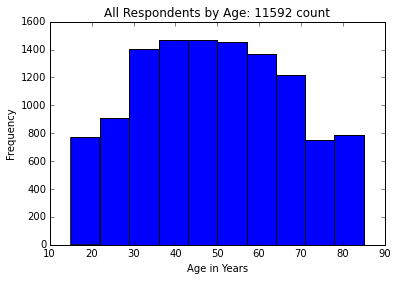

In [162]:
gender_sum['AGE'].plot(kind='hist')
plt.title("All Respondents by Age: {} count".format(gender_sum['CASE_ID'].count()))
plt.ylabel("Frequency")
plt.xlabel("Age in Years")

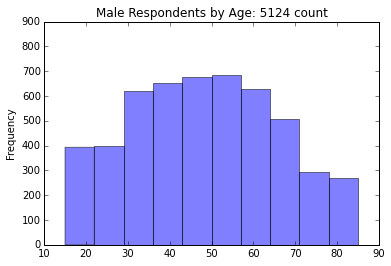

In [164]:
m_age['AGE'].plot(kind='hist', color='b', alpha=0.5, ylim=(0,900))
plt.title("Male Respondents by Age: {} count".format(m_age['AGE'].count()))
plt.ylabel("Frequency")

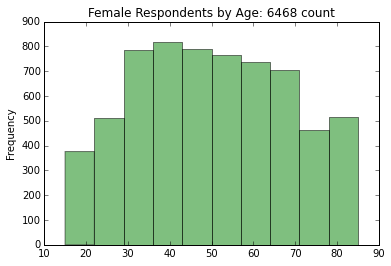

In [166]:
f_age['AGE'].plot(kind='hist', color='g', alpha=0.5)
plt.title("Female Respondents by Age: {} count".format(f_age['AGE'].count()))
plt.ylabel("Frequency")

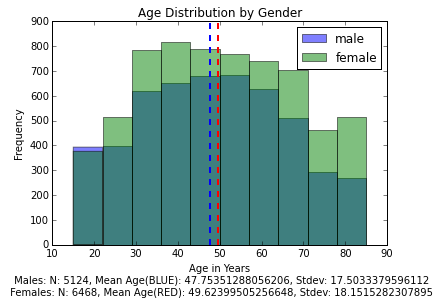

In [167]:
x = list(m_age['AGE'])      # true list of male ages
y = list(f_age['AGE'])      # true list of female ages
xm = m_age['AGE'].mean()    # mean of male ages
yf = f_age['AGE'].mean()    # mean of female ages

plt.hist(x, bins=10, alpha=0.5, label='male')
plt.axvline(xm, color='b', linestyle='dashed', linewidth=2)
plt.hist(y, bins=10, alpha=0.5, label='female')
plt.axvline(yf, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.title("Age Distribution by Gender")
plt.xlabel('Age in Years\n Males: N: {}, Mean Age(BLUE): {}, Stdev: {}\n Females: N: {}, Mean Age(RED): {}, Stdev: {}'
           .format(np.count_nonzero(x),
                   np.mean(x),
                   np.std(x),
                   np.count_nonzero(y),
                   np.mean(y),
                   np.std(y)
                  )
          )
plt.ylabel('Frequency')
plt.show()


In [106]:
pd.pivot_table(gender_sum, index=['GENDER'], values=['AGE'], aggfunc=[np.amin, 
                                                                      np.amax, 
                                                                      np.count_nonzero, 
                                                                      np.average, 
                                                                      np.std])

,amin,amax,count_nonzero,average,std
,AGE,AGE,AGE,AGE,AGE
GENDER,,,,,
1,15,85,5124,47.753513,17.505046
2,15,85,6468,49.623995,18.152932


A more detailed look at Home Schooling by Household Income:

In [58]:
home_school = all_summary[['tucaseid','TRERNWA','PEEDUCA','TRCHILDNUM','t030203',]]
home_school = home_school.rename(columns={'tucaseid': 'CASE_ID',
                                          'PEEDUCA': 'MAX_ED',                # need categories
                                          'TRERNWA': 'WEEKLY_EARN',           # implied 2 digit weekly $
                                          'TRCHILDNUM': 'CHILDREN',           # number of children under 18 yrs.
                                          't030203': 'HOME_SCHOOLED',         # household children are homeschooled
                                          }
                                 )
home_school = home_school[home_school.CHILDREN != 0]            # removes those without children
home_school = home_school[home_school.WEEKLY_EARN != -1]        # removes those without recorded income

Assumptions for the maximum education scoring in variable; 'PEEDUCA'
    1. <= 38:     less than high school
    2. 39:        high school
    3. 40 to 42:  some college
    4. 43:        Bachelor's degree
    5. >= 44:     Graduate degree

In [75]:
home_school.corr()

,CASE_ID,WEEKLY_EARN,MAX_ED,CHILDREN,HOME_SCHOOLED
CASE_ID,1.000000,-0.012341,-0.037618,0.002075,-0.015567
WEEKLY_EARN,-0.012341,1.000000,0.471904,0.018295,-0.015953
MAX_ED,-0.037618,0.471904,1.000000,-0.069425,0.006640
CHILDREN,0.002075,0.018295,-0.069425,1.000000,-0.019055
HOME_SCHOOLED,-0.015567,-0.015953,0.006640,-0.019055,1.000000


Observations:
    1. The strongest positive correlation is between higher education and weekly earnings (0.472).
    2. The weakest correlation is between home schooling and maximum education (0.007).
    3. The strongest negative correlation is between higher education and the number of children (-0.069).
    4. Home schooling has a slight negative correlation with the number of children (-0.019).
    5. DISCOVERY: Only 13 cases of home schooling were detected in the data set.
    6. DISCOVERY: Value of home schooling was NOT boolean.  Appears to be number of days per year of home schooling.
 

(array([   20.,    39.,    77.,    69.,   109.,   619.,   656.,   199.,
         1222.,   137.]),
 array([ 31. ,  32.5,  34. ,  35.5,  37. ,  38.5,  40. ,  41.5,  43. ,
         44.5,  46. ]),
 <a list of 10 Patch objects>)

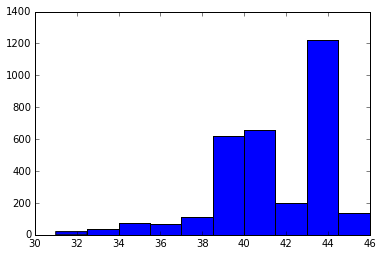

In [81]:
plt.hist(list(home_school['MAX_ED']),bins=(10))

(array([ 410.,  715.,  611.,  475.,  278.,  220.,  122.,   57.,   64.,  195.]),
 array([      0. ,   28846.1,   57692.2,   86538.3,  115384.4,  144230.5,
         173076.6,  201922.7,  230768.8,  259614.9,  288461. ]),
 <a list of 10 Patch objects>)

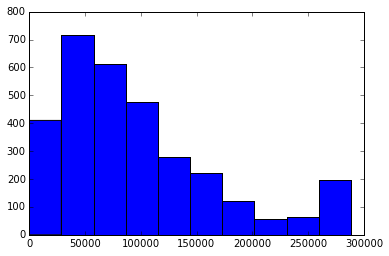

In [86]:
plt.hist(list(home_school['WEEKLY_EARN']),bins=(10))

(array([  1.34000000e+03,   1.20200000e+03,   4.69000000e+02,
          0.00000000e+00,   1.10000000e+02,   1.40000000e+01,
          0.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

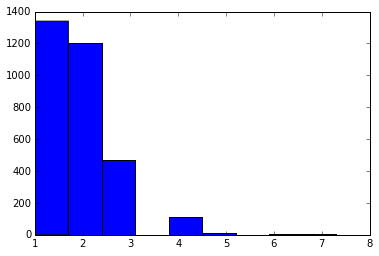

In [136]:
plt.hist(list(home_school['CHILDREN']),bins=(10))

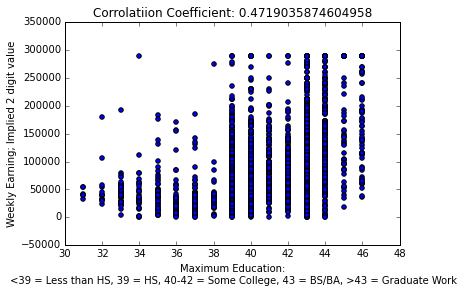

In [159]:
xhs = list(home_school['MAX_ED'])
yhs = list(home_school['WEEKLY_EARN'])
cf = home_school['MAX_ED'].corr(home_school['WEEKLY_EARN'])

plt.scatter(x=xhs, y=yhs)
plt.title("CorrElatiion Coefficient: {}".format(cf))
plt.xlabel("Maximum Education: \n <39 = Less than HS, 39 = HS, 40-42 = Some College, 43 = BS/BA, >43 = Graduate Work")
plt.ylabel("Weekly Earning; Implied 2 digit value")

### Income is positively associated with Education. 
1. A re-calculation using the maximum income across education would likely be stronger. 
2. A bump in earning potential is evident with at least some college education ("40"). 


### The data for Home Schooling appears to have been lost while filtering on children and income. 
1. Reviewed both the complete data set and the current DataFrame to understand the Home Schooling data. 
2. Attempting to verify a value of 360 in this row of data that should be equal to 0 or 1.
3. The data appears to be entered as the number of days being home schooled rather than as a boolean? 
2. The 'ver' DataFrame shows a small subset of Households with home schooling.  Reporting appears to be in "days of home schooling".  Expected a yes or no for home schooling and a larger number of home schoolers. However, there are only 13 cases of home schooling in not the a large number as shown.  
3. Moving on to a MVP.  Will abandon the analyis of home schooling.    

In [148]:
all_summary[all_summary['t030203'] == 360]

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
1282,20140201141256,12585834.525956,10,55,2,43,1,2,2,5,...,0,0,0,0,0,0,0,0,0,0


In [149]:
ver = all_summary[all_summary['t030203'] >= 1]

In [150]:
ver['t030203']

456     120
644      60
1282    360
1677    240
2246    330
2534     60
2775    125
5538     30
8374    240
8558    330
9135    150
9259    150
9863    120
Name: t030203, dtype: int64

(array([ 3.,  0.,  3.,  2.,  0.,  0.,  2.,  0.,  0.,  3.]),
 array([  30.,   63.,   96.,  129.,  162.,  195.,  228.,  261.,  294.,
         327.,  360.]),
 <a list of 10 Patch objects>)

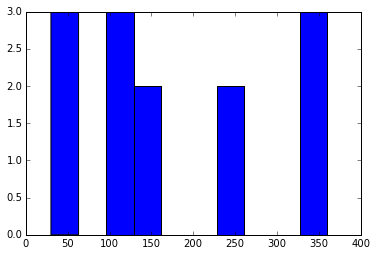

In [151]:
plt.hist(list(ver['t030203']))

In [138]:
# plt.hist(list(home_school['HOME_SCHOOLED']))   # TURNS OUT THERE IS NO DATA TO PLOT IN THIS DATA FRAME!

In [94]:
pd.pivot_table(home_school,index=['HOME_SCHOOLED'])    #Not sure why this breaks on 0, 60, 120, and 150! 

,CASE_ID,CHILDREN,MAX_ED,WEEKLY_EARN
HOME_SCHOOLED,,,,
0,2.014065e+13,1.82469,41.065224,97766.057588
60,2.014021e+13,1.00000,41.500000,120192.000000
120,2.014011e+13,2.00000,40.000000,73840.000000
150,2.014101e+13,1.00000,43.000000,8120.000000


In [95]:
home_school['HOME_SCHOOLED']=home_school['HOME_SCHOOLED'].astype('category')
home_school['HOME_SCHOOLED'].cat.set_categories([0,1], inplace=True)

In [96]:
pd.pivot_table(home_school,index=['HOME_SCHOOLED'])      #There are only zeros in the home_school dataframe.

,CASE_ID,CHILDREN,MAX_ED,WEEKLY_EARN
HOME_SCHOOLED,,,,
0,2.014065e+13,1.82469,41.065224,97766.057588
1,NaN,NaN,NaN,NaN


### New data added to the mix:
1. 'GTMETSTA' is the metropolitan status with coding:

    -1 = Blank
    -2 = Don't know
    -3 = Refused
     1 = Metropolitan
     2 = Non-metropolitan
     3 = Not identified
  
2. All but 1 and 2 will be filtered out for analysis.
3. 'HOME-SCHOOLED' will be removed and the DataFrame renamed.


In [201]:
metro_set = all_summary[['tucaseid','TRERNWA','PEEDUCA','TRCHILDNUM','GTMETSTA',]]
metro_set = metro_set.rename(columns={'tucaseid': 'CASE_ID',
                                      'PEEDUCA': 'MAX_ED',         # <HS,HS,some COLL, BS, Grad
                                      'TRERNWA': 'WEEKLY_EARN',    # implied 2 digit weekly $
                                      'TRCHILDNUM': 'CHILDREN',    # number of children under 18 yrs.
                                      'GTMETSTA': 'METRO',         # 1 = METRO, 2 = NONMETRO
                                     }
                            )
metro_set = metro_set[metro_set.WEEKLY_EARN != -1]        # removes those without recorded income
metro_set = metro_set[metro_set.METRO != -1]              # removes 'blanks'
metro_set = metro_set[metro_set.METRO != -2]              # removes 'don't know'
metro_set = metro_set[metro_set.METRO != -3]              # removes 'refused'
metro_set = metro_set[metro_set.METRO != 3]               # removes 'Not Identified'


In [202]:
metro_set.head()

,CASE_ID,WEEKLY_EARN,MAX_ED,CHILDREN,METRO
1,20140101140011,184615,37,1,1
6,20140101140559,80000,43,1,2
7,20140101140610,100000,42,1,1
8,20140101140614,14490,40,0,1
10,20140101140665,73076,39,0,1


In [203]:
metro_set.describe()

,CASE_ID,WEEKLY_EARN,MAX_ED,CHILDREN,METRO
count,6.170000e+03,6170.000000,6170.000000,6170.000000,6170.000000
mean,2.014066e+13,94687.026904,41.097083,0.923501,1.150081
std,3.498728e+08,68926.790771,2.575709,1.113723,0.357180
min,2.014010e+13,0.000000,31.000000,0.000000,1.000000
25%,2.014030e+13,44230.000000,39.000000,0.000000,1.000000
50%,2.014061e+13,76923.000000,41.000000,1.000000,1.000000
75%,2.014091e+13,125000.000000,43.000000,2.000000,1.000000
max,2.014121e+13,288461.000000,46.000000,8.000000,2.000000


In [231]:
metro_set.pop('CASE_ID')

In [212]:
metro_set.corr()

,WEEKLY_EARN,MAX_ED,CHILDREN,METRO
WEEKLY_EARN,1.000000,0.445512,0.043411,-0.110518
MAX_ED,0.445512,1.000000,-0.037192,-0.099182
CHILDREN,0.043411,-0.037192,1.000000,0.012974
METRO,-0.110518,-0.099182,0.012974,1.000000


Observations:
1. Maximum education shows positive correlation with higher weekly earnings(0.446).
2. Number of children slightly positive correlation with higher weekly earnings (0.043).
3. Metro living (Metro = 1 vs Non-metro = 2).  Earning is better in the city (-0.111).
4. Fewer children with higher education (-0.037).
5. Higher education in the Metro enviroment (-0.099).
6. More children with Non-metro living (0.013).

Will look at data for Metro (Metro=1, Non-metro=2) vs. Weekly Earnings:


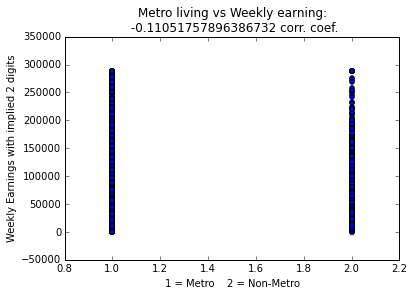

In [219]:
xmet = list(metro_set['METRO'])
ymet = list(metro_set['WEEKLY_EARN'])

plt.scatter(x=xmet, y=ymet)
plt.title("Metro living vs Weekly earning:\n {} corr. coef.".format(metro_set['METRO'].corr(metro_set['WEEKLY_EARN'])))
plt.xlabel("1 = Metro    2 = Non-Metro")
plt.ylabel("Weekly Earnings with implied 2 digits")
plt.show()

In [211]:
metro_set.pivot_table(index='METRO')

,CHILDREN,MAX_ED,WEEKLY_EARN
METRO,,,
1,0.917429,41.204424,97887.825706
2,0.957883,40.489201,76560.688985


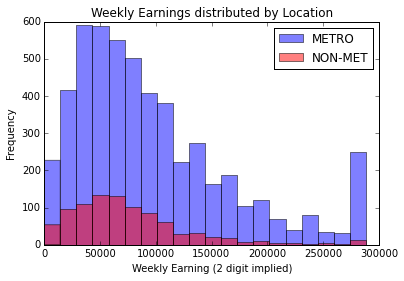

In [223]:
mset1 = metro_set[metro_set['METRO'] == 1]  #DataFrame with Metro = 1
mset2 = metro_set[metro_set['METRO'] == 2]  #DataFrame with Metro = 2

x = list(mset1['WEEKLY_EARN'])   #list of weekly earnings by Metro = 1
y = list(mset2['WEEKLY_EARN'])   #list of weekly earnings by Metro = 2

plt.hist(x, bins=20, alpha=0.5, color='b', label='METRO')
plt.hist(y, bins=20, alpha=0.5, color='r', label='NON-MET')
plt.title("Weekly Earnings distributed by Location")
plt.legend(loc='upper right')
plt.xlabel("Weekly Earning (2 digit implied)")
plt.ylabel("Frequency")
plt.show()

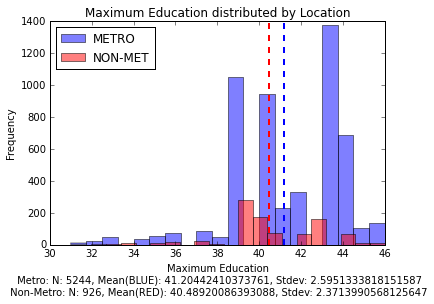

In [228]:
mset1 = metro_set[metro_set['METRO'] == 1]  #DataFrame with Metro = 1
mset2 = metro_set[metro_set['METRO'] == 2]  #DataFrame with Metro = 2

x = list(mset1['MAX_ED'])   #list of weekly earnings by Metro = 1
y = list(mset2['MAX_ED'])   #list of weekly earnings by Metro = 2

xm = mset1['MAX_ED'].mean()    # mean of education by Metro = 1
yf = mset2['MAX_ED'].mean()    # mean of education by Metro = 2


plt.hist(x, bins=20, alpha=0.5, color='b', label='METRO')
plt.axvline(xm, color='b', linestyle='dashed', linewidth=2)
plt.hist(y, bins=20, alpha=0.5, color='r', label='NON-MET')
plt.axvline(yf, color='r', linestyle='dashed', linewidth=2)
plt.title("Maximum Education distributed by Location")
plt.legend(loc='upper left')
plt.xlabel('Maximum Education\n Metro: N: {}, Mean(BLUE): {}, Stdev: {}\n Non-Metro: N: {}, Mean(RED): {}, Stdev: {}'
           .format(np.count_nonzero(x),
                   np.mean(x),
                   np.std(x),
                   np.count_nonzero(y),
                   np.mean(y),
                   np.std(y)
                  )
          )
plt.ylabel("Frequency")
plt.show()

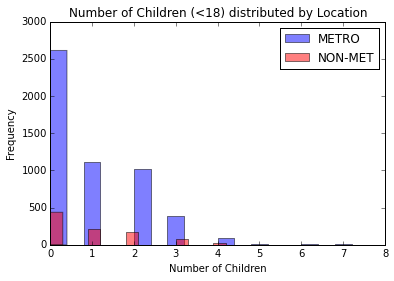

In [227]:
mset1 = metro_set[metro_set['METRO'] == 1]  #DataFrame with Metro = 1
mset2 = metro_set[metro_set['METRO'] == 2]  #DataFrame with Metro = 2

x = list(mset1['CHILDREN'])   #list of children by Metro = 1
y = list(mset2['CHILDREN'])   #list of children by Metro = 2

plt.hist(x, bins=20, alpha=0.5, color='b', label='METRO')
plt.hist(y, bins=20, alpha=0.5, color='r', label='NON-MET')
plt.title("Number of Children (<18) distributed by Location")
plt.legend(loc='upper right')
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()